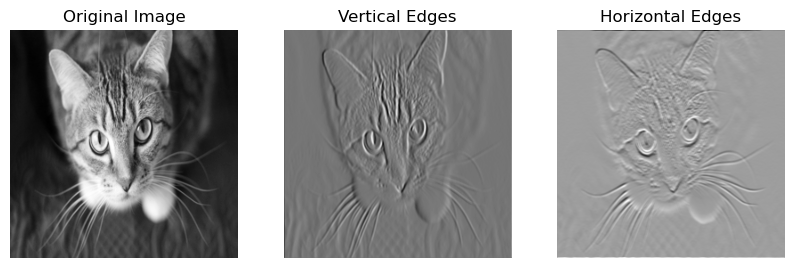

In [7]:
import tensorflow as tf
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

# Load an image using PIL
image = Image.open("catsample.jpg").convert("L")  # Load as grayscale
image = image.resize((256, 256))  # Resize for simplicity
image = np.array(image, dtype=np.float32) / 255.0  # Convert to float32 and normalize

# Add batch and channel dimensions (1, 256, 256, 1)
image = np.expand_dims(image, axis=(0, -1))

# Define vertical and horizontal edge detection filters (Sobel-like)
vertical_filter = np.array([[1, 0, -1],
                            [1, 0, -1],
                            [1, 0, -1]], dtype=np.float32)

horizontal_filter = np.array([[1,  1,  1],
                              [0,  0,  0],
                              [-1, -1, -1]], dtype=np.float32)

# Reshape filters for TensorFlow (H, W, in_channels, out_channels)
vertical_filter = vertical_filter.reshape(3, 3, 1, 1)
horizontal_filter = horizontal_filter.reshape(3, 3, 1, 1)

# Apply convolution
vertical_edges = tf.nn.conv2d(image, vertical_filter, strides=[1, 1, 1, 1], padding="SAME")
horizontal_edges = tf.nn.conv2d(image, horizontal_filter, strides=[1, 1, 1, 1], padding="SAME")

# Convert tensors to numpy for visualization
vertical_edges = vertical_edges.numpy().squeeze()
horizontal_edges = horizontal_edges.numpy().squeeze()

# Plot original and filtered images
plt.figure(figsize=(10, 4))
plt.subplot(1, 3, 1)
plt.imshow(image.squeeze(), cmap="gray")
plt.title("Original Image")
plt.axis("off")

plt.subplot(1, 3, 2)
plt.imshow(vertical_edges, cmap="gray")
plt.title("Vertical Edges")
plt.axis("off")

plt.subplot(1, 3, 3)
plt.imshow(horizontal_edges, cmap="gray")
plt.title("Horizontal Edges")
plt.axis("off")

plt.show()


image dim 2


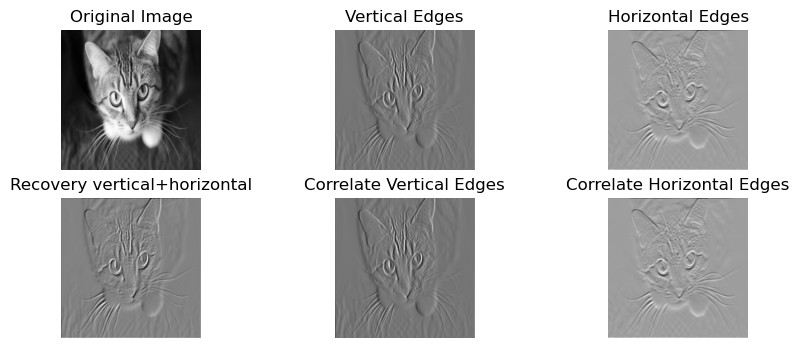

In [18]:
import tensorflow as tf
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from scipy.signal import correlate2d


# Load an image using PIL
image = Image.open("catsample.jpg").convert("L")  # Load as grayscale
image = image.resize((256, 256))  # Resize for simplicity
image = np.array(image, dtype=np.float32) / 255.0  # Convert to float32 and normalize


# Define vertical and horizontal edge detection filters (Sobel-like)
vertical_filter = np.array([[1, 0, -1],
                            [1, 0, -1],
                            [1, 0, -1]], dtype=np.float32)

horizontal_filter = np.array([[1,  1,  1],
                              [0,  0,  0],
                              [-1, -1, -1]], dtype=np.float32)


corr_result_vertical = correlate2d(image, vertical_filter, mode='same')
corr_result_horizontal = correlate2d(image, horizontal_filter, mode='same')

# Add batch and channel dimensions (1, 256, 256, 1)
image = np.expand_dims(image, axis=(0, -1))

# Reshape filters for TensorFlow (H, W, in_channels, out_channels)
vertical_filter = vertical_filter.reshape(3, 3, 1, 1)
horizontal_filter = horizontal_filter.reshape(3, 3, 1, 1)

# Apply convolution
vertical_edges = tf.nn.conv2d(image, vertical_filter, strides=[1, 1, 1, 1], padding="SAME")
horizontal_edges = tf.nn.conv2d(image, horizontal_filter, strides=[1, 1, 1, 1], padding="SAME")

# Convert tensors to numpy for visualization
vertical_edges = vertical_edges.numpy().squeeze()
horizontal_edges = horizontal_edges.numpy().squeeze()

# Plot original and filtered images
plt.figure(figsize=(10, 4))
plt.subplot(2, 3, 1)
plt.imshow(image.squeeze(), cmap="gray")
plt.title("Original Image")
plt.axis("off")

plt.subplot(2, 3, 2)
plt.imshow(vertical_edges, cmap="gray")
plt.title("Vertical Edges")
plt.axis("off")

plt.subplot(2, 3, 3)
plt.imshow(horizontal_edges, cmap="gray")
plt.title("Horizontal Edges")
plt.axis("off")

plt.subplot(2, 3, 4)
plt.imshow(corr_result_vertical+corr_result_horizontal, cmap="gray")
plt.title("Recovery vertical+horizontal")
plt.axis("off")

plt.subplot(2, 3, 5)
plt.imshow(corr_result_vertical, cmap="gray")
plt.title("Correlate Vertical Edges")
plt.axis("off")

plt.subplot(2, 3, 6)
plt.imshow(corr_result_horizontal, cmap="gray")
plt.title("Correlate Horizontal Edges")
plt.axis("off")

plt.show()
